In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt  # import txt format
from tensorflow.keras.models import Sequential # build the model
from tensorflow.keras.layers import Dense  # ANN
import tensorflow as tf
tf.keras.utils.set_random_seed(123)
tf.config.experimental.enable_op_determinism()
from tensorflow.keras.utils import to_categorical
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import cv2
from sklearn.decomposition import PCA

In [2]:
def get_image_array(path):
    images = []
    image_list = os.listdir(path)

    for img_filename in image_list:
        img_path = os.path.join(path, img_filename)
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (500,500))
        if img is not None:
            images.append(img)

    return np.array(images)

In [3]:
img = 'D:/FOML PROJ/'

In [4]:
img1 = get_image_array(img)
img1.shape

(30, 500, 500)

In [5]:
img1 = img1.reshape(30,(500*500))
img1.shape

(30, 250000)

In [6]:
img1 = img1.astype('float32')/255
img1

array([[0.654902  , 0.6901961 , 0.47843137, ..., 0.45490196, 0.43529412,
        0.4627451 ],
       [0.14509805, 0.2784314 , 0.28627452, ..., 0.6039216 , 0.63529414,
        0.6431373 ],
       [0.16470589, 0.13333334, 0.18431373, ..., 0.20784314, 0.19607843,
        0.26666668],
       ...,
       [0.22352941, 0.23529412, 0.23529412, ..., 0.20392157, 0.19607843,
        0.1882353 ],
       [0.14117648, 0.14901961, 0.06666667, ..., 0.3019608 , 0.01960784,
        0.0627451 ],
       [0.4392157 , 0.43529412, 0.41960785, ..., 0.24313726, 0.25882354,
        0.2509804 ]], dtype=float32)

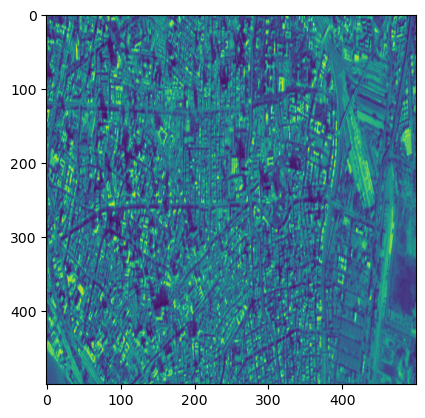

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img1[12].reshape(500,500))

In [8]:
pca = PCA(0.9)
pca.fit(img1)
print(pca.components_.shape)

(22, 250000)


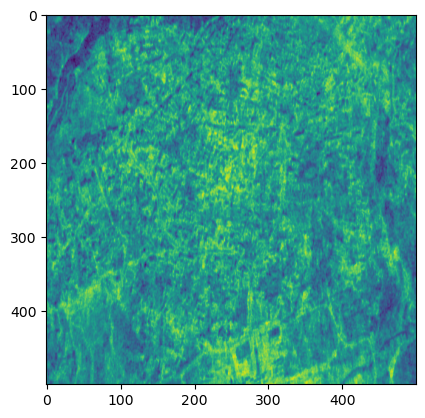

In [9]:
plt.imshow(pca.components_[5].reshape(500,500))

In [10]:
print(pca.explained_variance_)

[1650.6875    531.6843    324.07092   273.18045   230.45976   215.69089
  197.56947   192.09598   190.33298   180.10713   177.82703   160.71892
  151.21594   143.97865   140.3722    129.998     120.74582   116.81712
  114.97583   108.95619   104.30605    93.761086]


In [11]:
B = pca.transform(img1) 
print(B)
print(pca.explained_variance_ratio_)

[[-3.99479556e+00 -2.54777527e+01 -1.22543335e+01 -2.16859360e+01
  -5.92847729e+00 -6.84087658e+00  1.86664581e+01  1.56459150e+01
   5.18756256e+01 -2.84459877e+01 -5.10222292e+00 -7.23042679e+00
   6.59897804e+00 -1.19763994e+01 -2.17926002e+00 -3.99577904e+00
  -1.59791923e+00 -2.19837618e+00  2.56502366e+00  4.10104066e-01
  -3.49217385e-01  6.01831627e+00]
 [ 8.26839142e+01  9.18600998e+01  3.19199371e+00  1.95134277e+01
  -3.51713943e+00 -1.65633368e+00  6.58860493e+00 -1.88923371e+00
   5.33839178e+00 -9.87756729e+00 -1.59361029e+01  5.22670174e+00
   3.84305859e+00 -1.86420746e+01  3.37585330e+00 -2.05580235e+00
  -2.93756461e+00  6.35834503e+00 -6.73247576e-01 -1.09848106e+00
  -1.73646903e+00  1.27813828e+00]
 [ 6.93559980e+00  7.37218857e+00 -1.25900936e+01  1.51504459e+01
  -2.93099518e+01 -5.13475513e+00 -3.43720589e+01  5.23985519e+01
   2.14572287e+00  1.06434784e+01  1.20163994e+01  5.79690218e-01
  -7.38980174e-02  5.76466560e+00 -1.01133609e+00 -3.57210898e+00
   6.3

In [12]:
B.shape

(30, 22)

In [13]:
labels = np.array([0., 0., 0., 0., 0., 0., 0., 0.,0.,0.,0.,0.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1.,1., 1., 1.,1., 0.])
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [14]:
model = Sequential()

model.add(Dense(40, input_shape=(22,), activation = 'relu'))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                920       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1761 (6.88 KB)
Trainable params: 1761 (6.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])

In [16]:
hist = model.fit(B,labels, epochs=20, batch_size = 10)

Epoch 1/20
3/3 [==============================] - 2s 8ms/step - loss: 0.7454 - accuracy: 0.5333
Epoch 2/20
3/3 [==============================] - 0s 0s/step - loss: 0.6674 - accuracy: 0.6333
Epoch 3/20
3/3 [==============================] - 0s 0s/step - loss: 0.6145 - accuracy: 0.6333
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 0.5751 - accuracy: 0.6333
Epoch 5/20
3/3 [==============================] - 0s 0s/step - loss: 0.5374 - accuracy: 0.6333
Epoch 6/20
3/3 [==============================] - 0s 0s/step - loss: 0.5111 - accuracy: 0.7000
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 0.4902 - accuracy: 0.7000
Epoch 8/20
3/3 [==============================] - 0s 0s/step - loss: 0.4607 - accuracy: 0.7000
Epoch 9/20
3/3 [==============================] - 0s 195us/step - loss: 0.4393 - accuracy: 0.8000
Epoch 10/20
3/3 [==============================] - 0s 9ms/step - loss: 0.4192 - accuracy: 0.8000
Epoch 11/20
3/3 [=========================

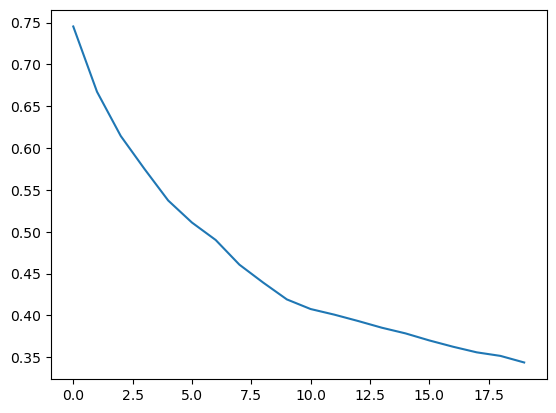

In [17]:
plt.plot(hist.history['loss'])
plt.show()

In [18]:
model.evaluate(B,labels)

1/1 [==============================] - 0s 148ms/step - loss: 0.3324 - accuracy: 0.9667


[0.3323534429073334, 0.9666666388511658]

In [19]:
y_pred = model.predict(B)
y_pred

1/1 [==============================] - 0s 69ms/step


array([[0.38366687],
       [0.84935856],
       [0.24474974],
       [0.40036824],
       [0.25992623],
       [0.39798492],
       [0.15847595],
       [0.4825635 ],
       [0.11032429],
       [0.29373223],
       [0.21120039],
       [0.31938645],
       [0.9194501 ],
       [0.8136854 ],
       [0.51048636],
       [0.5628646 ],
       [0.9588827 ],
       [0.95041704],
       [0.93016213],
       [0.95947117],
       [0.9511838 ],
       [0.56287885],
       [0.94400436],
       [0.95546454],
       [0.85485756],
       [0.8011711 ],
       [0.68113905],
       [0.8697161 ],
       [0.94250435],
       [0.47375804]], dtype=float32)

In [20]:
y_pred = (y_pred>0.5).astype('int32')
y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [21]:
lda = LDA()
k = lda.fit(B, labels)
y_lda_pred = lda.predict(B)

In [22]:
y_lda_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [23]:
print(confusion_matrix(labels, y_lda_pred))
print(accuracy_score(labels, y_lda_pred))

[[12  1]
 [ 0 17]]
0.9666666666666667
